In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
PATH = " " # Path to your file

df = pd.read_csv("TravelInsurancePrediction.csv")
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
pca = PCA()
gau_nb = GaussianNB()
pipe = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler, PCA and a model

# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(2, -3, num=100)
param_grid = {
    "pca__n_components": [0,2,4,6,8,10],
    'gau_nb__var_smoothing': var_smoothing_values
    }

search = GridSearchCV(pipe, param_grid, scoring="precision", n_jobs=8)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Best parameters: ", search.best_params_)
print("Training precision score: ", search.best_score_)
print("Test precision score: ", search.score(X_test, y_test))
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))


Best parameter (CV score=1.000):
{'gau_nb__var_smoothing': 1.9179102616724888, 'pca__n_components': 2}
Best parameters:  {'gau_nb__var_smoothing': 1.9179102616724888, 'pca__n_components': 2}
Training precision score:  1.0
Test precision score:  1.0
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       303
           1       1.00      0.28      0.43        72

    accuracy                           0.86       375
   macro avg       0.93      0.64      0.68       375
weighted avg       0.88      0.86      0.83       375



In [5]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    if df.isnull().values.any():
        df = df.dropna() # Drop null values
    if df.duplicated().values.any():
        df = df.drop_duplicates() # Drop duplicated rows    
    df = df
    return df
df = preprocessing_data(df.copy())

<AxesSubplot:>

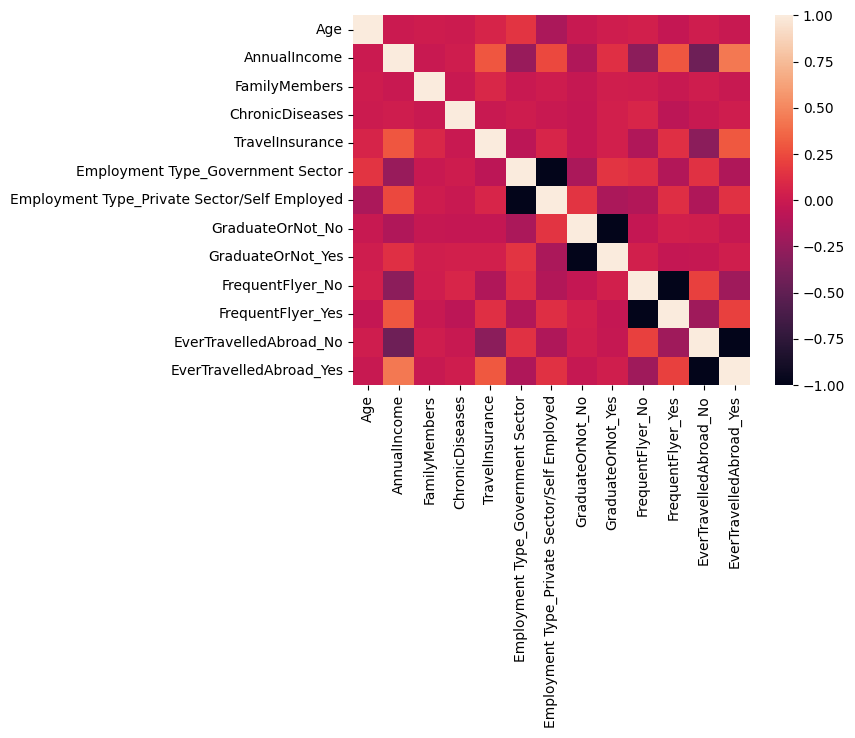

In [6]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"] # Lấy các features có dạng categorical (string) 
    #cat_cols.remove("TravelInsurance")
    #X = pd.get_dummies(df, columns=cat_cols)
    temp = pd.get_dummies(df[cat_cols])
    df.drop(cat_cols, axis=1, inplace=True) # Remove category columns
    df = pd.concat([df, temp], axis=1) # nối dataframe data với các giá trị dummy của feature col
    
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [7]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    X = df.drop('TravelInsurance', axis=1, inplace=False).values
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    #X = df.drop(["TravelInsurance"], axis=1) # Todo: Select features
    y = df[df.columns[-1]].values # Todo: Select label
    #y = [0 if i=="Yes" else 1 for i in y] 
    return X, y

X, y = prepare_X_y(df)

In [8]:
#Chia dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)